<a href="https://colab.research.google.com/github/ayushiiii28/DataSet/blob/main/titanic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Load
# Loading the dataset into a pandas DataFrame (assuming 'data.csv' is the dataset)
data=pd.read_csv('/content/titanic_train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# Checking for null values
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [4]:
# Display the basic statistics to understand the dataset
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


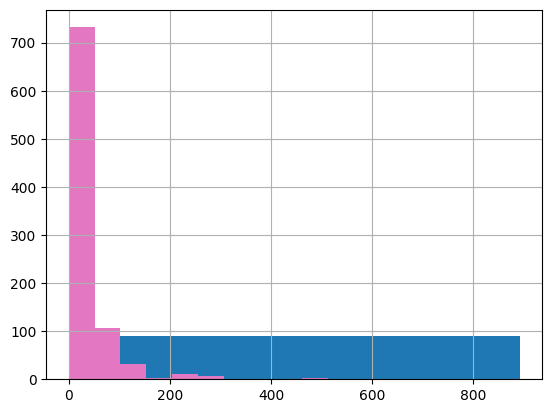

In [5]:
# Univariate analysis: Check distributions for individual columns
for column in data.select_dtypes(include=['int64', 'float64']):
    data[column].hist()

In [6]:
# Bivariate and Multivariate analysis: Check correlations between features
correlation_matrix = data.corr()  # Compute correlation matrix
print(correlation_matrix)  # Display correlation matrix

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

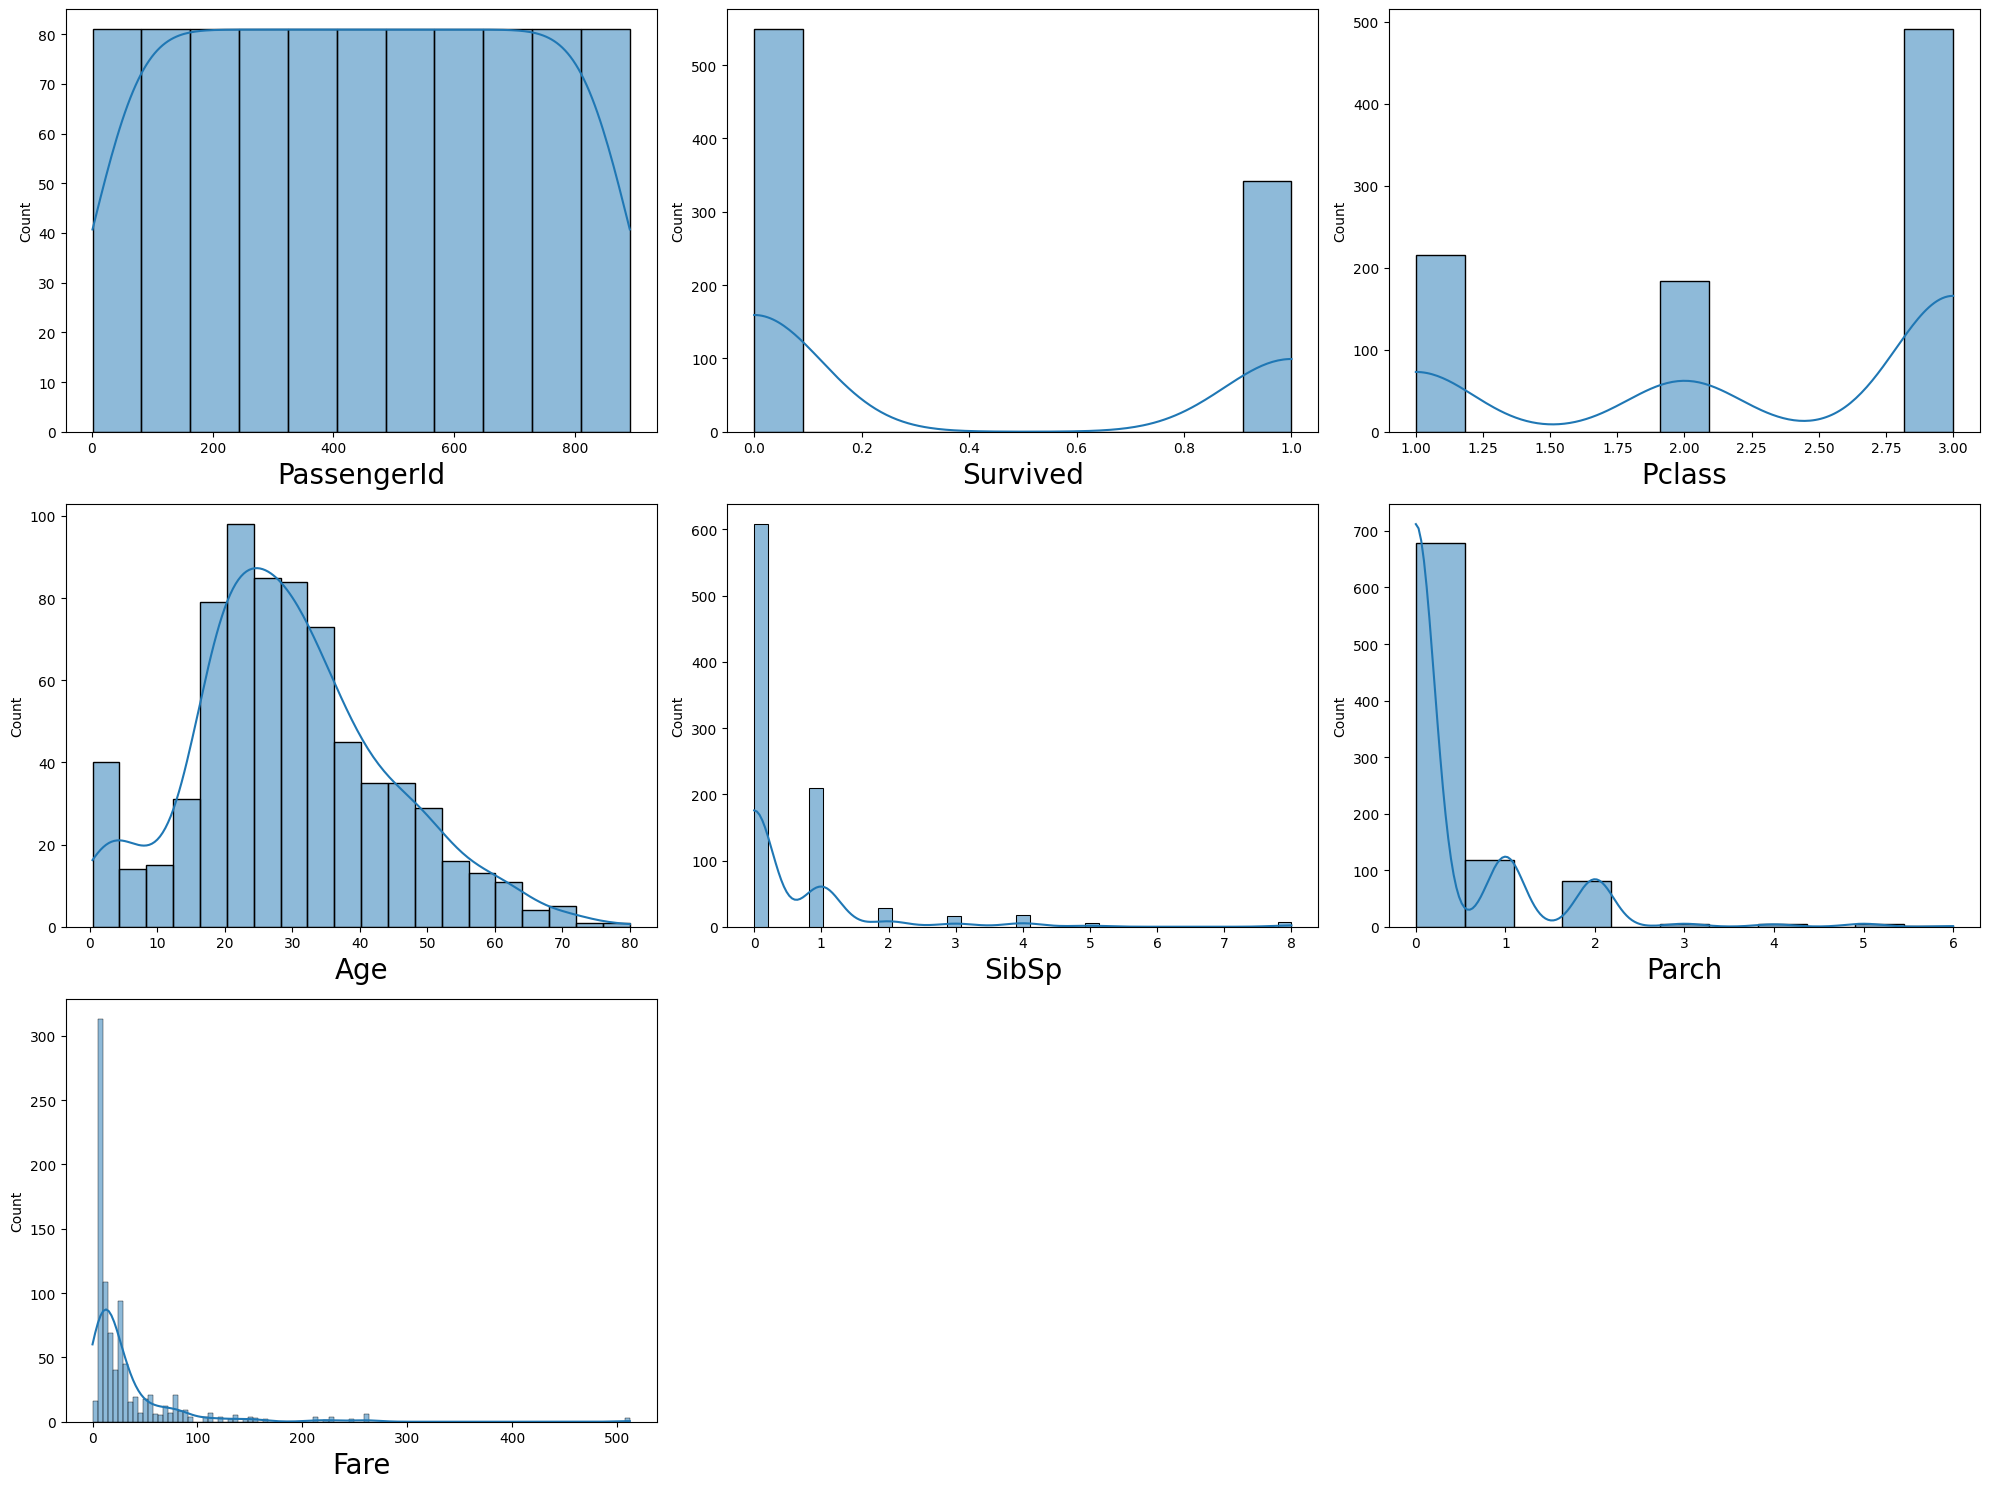

In [7]:
#Plotting  histograms

plt.figure(figsize=(20, 15))
plotnumber = 1

# Plot numeric columns
for column in data.select_dtypes(include=['int64', 'float64']):  # Only select numeric columns
    if plotnumber <= 9:  # Limit to 9 plots
        ax = plt.subplot(3, 3, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=20)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [8]:
#Using IQR to remove outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal to the selected columns
data_clean = remove_outliers(data, 'Age')
data_clean = remove_outliers(data, 'Fare')
data_clean = remove_outliers(data, 'SibSp')
data_clean = remove_outliers(data, 'Parch')

In [9]:
# Checking the clean data's shape
data_clean.shape

(678, 12)

In [10]:
# Removing unneccessary columns
data_clean.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

In [11]:
# Preprocessing
# Handle missing values and encode categorical features

data_clean['Age'].fillna(data_clean['Age'].median(), inplace=True)

# For 'Embarked', we will fill missing values with the most frequent value (mode).
data_clean['Embarked'].fillna(data_clean['Embarked'].mode()[0], inplace=True)


In [12]:
# Checking clean data's null values
data_clean.isna().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [13]:
#Encoding for categorical columns

from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns 'Sex' and 'Embarked'
label_encoder = LabelEncoder()

# Apply label encoding to 'Sex' and 'Embarked'
data_clean['Sex'] = label_encoder.fit_transform(data_clean['Sex'])
data_clean['Embarked'] = label_encoder.fit_transform(data_clean['Embarked'])


In [14]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = data_clean.drop(columns=['Survived'])
y = data_clean['Survived']

# Splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((542, 7), (136, 7), (542,), (136,))

In [15]:
# Standardize the features (PCA or model scaling may require this step)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
# We have defined a metric method that prints the mae, mse and r2 score

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, r2_score

def metrics_score(model, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred = model.predict(X_train)
        print("==================Training Score=================")
        print("Accuracy ==> ", accuracy_score(y_train, y_pred))
        print("Mean Absolute Error (MAE) ==> ", mean_absolute_error(y_train, y_pred))
        print("Mean Squared Error (MSE) ==> ", mean_squared_error(y_train, y_pred))
        print("R-squared (R2) ==> ", r2_score(y_train, y_pred))
    else:
        y_pred = model.predict(X_test)
        print("==================Test Score=================")
        print("Accuracy ==> ", accuracy_score(y_test, y_pred))
        print("Mean Absolute Error (MAE) ==> ", mean_absolute_error(y_test, y_pred))
        print("Mean Squared Error (MSE) ==> ", mean_squared_error(y_test, y_pred))
        print("R-squared (R2) ==> ", r2_score(y_test, y_pred))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression
logistic_reg = LogisticRegression()

# Fit the model on the training set
logistic_reg.fit(X_train, y_train)

# Print training metrics
metrics_score(logistic_reg, X_train, X_test, y_train, y_test, train=True)

# Print test metrics
metrics_score(logistic_reg, X_train, X_test, y_train, y_test, train=False)


# Cross-validation (5-fold) to check for model robustness
cv_scores_logistic = cross_val_score(logistic_reg, X_train, y_train, cv=5, scoring='accuracy')
print(f'Logistic Regression Cross-Validation Accuracy: {cv_scores_logistic.mean():.4f}')


==================Training Score=================
Accuracy ==>  0.8265682656826568
Mean Absolute Error (MAE) ==>  0.17343173431734318
Mean Squared Error (MSE) ==>  0.17343173431734318
R-squared (R2) ==>  0.2305787120937538
==================Test Score=================
Accuracy ==>  0.7794117647058824
Mean Absolute Error (MAE) ==>  0.22058823529411764
Mean Squared Error (MSE) ==>  0.22058823529411764
R-squared (R2) ==>  0.02462347597418124
Logistic Regression Cross-Validation Accuracy: 0.8284


In [18]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
random_forest = RandomForestClassifier()

# Fit the model on the training set
random_forest.fit(X_train, y_train)

# Print training metrics
metrics_score(random_forest, X_train, X_test, y_train, y_test, train=True)

# Print test metrics
metrics_score(random_forest, X_train, X_test, y_train, y_test, train=False)

# Cross-validation accuracy (5-fold)
cv_scores_forest = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print(f'Random Forest Cross-Validation Accuracy: {cv_scores_forest.mean():.4f}')


==================Training Score=================
Accuracy ==>  0.9686346863468634
Mean Absolute Error (MAE) ==>  0.03136531365313653
Mean Squared Error (MSE) ==>  0.03136531365313653
R-squared (R2) ==>  0.8608493415488704
==================Test Score=================
Accuracy ==>  0.8161764705882353
Mean Absolute Error (MAE) ==>  0.18382352941176472
Mean Squared Error (MSE) ==>  0.18382352941176472
R-squared (R2) ==>  0.18718622997848433
Random Forest Cross-Validation Accuracy: 0.7860


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# GridSearchCV to tune hyperparameters (set verbose=0 to suppress detailed output)
grid_search_rf = GridSearchCV(random_forest, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=0)

# Fit GridSearchCV
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best score
print(f'Best Parameters: {grid_search_rf.best_params_}')
print(f'Best Cross-Validation Accuracy: {grid_search_rf.best_score_:.4f}')

# Evaluate the best model on the test set
best_rf_model = grid_search_rf.best_estimator_
test_accuracy = accuracy_score(y_test, best_rf_model.predict(X_test))
print(f'Test Accuracy of the Best Random Forest Model: {test_accuracy:.4f}')


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.8303
Test Accuracy of the Best Random Forest Model: 0.8088


In [20]:
import pickle
# Save the model to a file using pickle
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)

# Load the model from the file
with open('random_forest_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Use the loaded model to make predictions
predictions = loaded_model.predict(X_test)
